<a href="https://colab.research.google.com/github/tg-bomze/collection-of-notebooks/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Face Identification and Verification</font></b>

<b><font color="black" size="+2">Основан на:</font></b>

**GitHub репозитории**: [dlib](https://github.com/davisking/dlib)

Детектор: [face_recognition](http://dlib.net/face_recognition.py.html)

Библиотека: [dlib](http://dlib.net/)

<b><font color="black" size="+2">Собрал Колаб:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).

---

<b><font color="black" size="+2">Инструкция:</font></b>

1) Сохраните веса предобученной модели. Для этого перейдите по ссылке [https://drive.google.com/drive/folders/1_1T6rDsYXiMAe5RZg2miLEGBtuDogxmz](https://drive.google.com/drive/folders/1_1T6rDsYXiMAe5RZg2miLEGBtuDogxmz?usp=sharing). Там вы увидите два файла и прямо над ними название папки "**DLIB**". Ткните правой кнопкой мыши по этому названию (*DLIB*) и выберите "Добавить ярлык на Диск". 

2) Далее создайте папку в вашем Гугл Диске, куда поместите фотографии лиц. Это будет ваша база поиска. Рекомендуется также дать каждому файлу имя, соответствующее имени человека на фотографии. Если в папке будет лежать одно фото, значит скрипт будет работать как верификатор, если много, то как идентификатор.

---

```
Чтобы начать, нажмите на кнопку (куда указывает красная стрелка), после чего дождитесь завершения выполнения блока.
```

In [1]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Сохраняем веса предобученной модели и копируем их в Колаб</font></b>
#@markdown **После запуска блока следуйте появившейся инструкции.**
import os
import dlib
from skimage import io
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance
from IPython.display import clear_output

print("Перейдите по ссылке ниже, выберите аккаунт, куда сохранили веса предобученной модели,")
print("нажмите на кнопку 'Разрешить', скопируйте авторизационный код в нижнее поле и нажмите Enter.")
drive.mount('/gdrive')

sp = dlib.shape_predictor('/gdrive/My Drive/DLIB/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/gdrive/My Drive/DLIB/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()
clear_output()

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Получаем дескрипторы лиц из вашей базы</font></b>
#@markdown **Укажите название папки с лицами:**
try:
  path_to_photos = 'faces' #@param {type:"string"}
  face_descriptors = []
  faces = os.listdir('/gdrive/My Drive/' + path_to_photos)
  count = 0
  for i in faces:
    count += 1
    img = io.imread('/gdrive/My Drive/' + path_to_photos + '/' + i)
    dets = detector(img, 1)
    for k, d in enumerate(dets): shape = sp(img, d)
    face_descriptors.append(facerec.compute_face_descriptor(img, shape))
    progress = str(round((100/len(faces))*count))
    print("Загружено фото в базу: {}% из 100%".format(progress))
  clear_output()
  print("Все фото успешно загружены!")
except:
  print("Что-то пошло не так. Возможно вы не правильно указали путь к папке с фотографиями.")
#@markdown *Если ваша папка с лицами лежит внутри другой папки (например, photos), то следует писать полный путь так: **photos/faces**.*

Полученное лицо совпадает с лицом на фото Mona.jpg
Эвклидово расстояние между дескрипторами: 0.5782768506299378



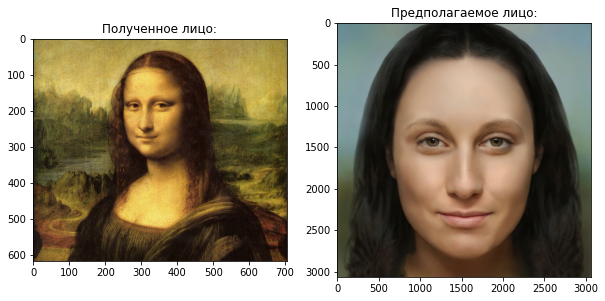

In [20]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Загружаем фото для распознавания и узнаем результат</font></b>

#@markdown *Введите ссылку на изображение или оставьте поле **url** пустым (в таком случае будет предложено загрузить фото с компьютера).*
url = '' #@param {type:"string"}
if url == '':
  uploaded = list(files.upload().keys())
  if len(uploaded) > 1: raise ValueError('Вы можете загрузить только одно изображение!')
  fat = uploaded[0]
else:
  try:
    !wget $url
    fat = url.split('/')[-1]
  except BaseException:
    print("Что-то пошло не так. Попробуйте загрузить фото с компьютера")

img = io.imread(fat)
dets_webcam = detector(img, 1)
for k, d in enumerate(dets_webcam): shape = sp(img, d)
main_descriptor = facerec.compute_face_descriptor(img, shape)

from PIL import Image
distances = []
for i in face_descriptors: distances.append(distance.euclidean(main_descriptor, i))
min_dist = min(distances)
img2 = io.imread('/gdrive/My Drive/' + path_to_photos + '/' + faces[distances.index(min_dist)])

clear_output()
if min_dist > 0.6 and len(face_descriptors) == 1:
  print('На фотографиях разные люди!')
elif min_dist <= 0.6 and len(face_descriptors) > 1:
  print('Полученное лицо совпадает с лицом на фото ' + faces[distances.index(min_dist)])
elif min_dist > 0.6 and len(face_descriptors) > 1:
  print('Точно сказать не могу, но наверное это человек с фотографии ' + faces[distances.index(min_dist)])

print('Эвклидово расстояние между дескрипторами: ' + str(min_dist) + '\n')

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title(f"Полученное лицо:")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Предполагаемое лицо:")
plt.imshow(img2)
plt.show()